In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifiers
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules

DATA UNDERSTANDING

In [47]:
df = pd.read_csv("data_transaksi_petshop.csv")
df

,ID Transaksi,Tanggal Transaksi,Nama Barang,Kategori,Jumlah Terjual,Harga Satuan,Total Harga,Metode Pembayaran
0,TX-20241023-001,2024-10-23,"Life Cat Pouch - Kitten Tuna, Life Cat Pouch -...","Makanan, Makanan","9, 1","25000, 13000","225000, 13000",QRIS
1,TX-20240511-001,2024-05-11,Kong Puppy Teething Stick,Mainan,5,20000,100000,QRIS
2,TX-20240515-001,2024-05-15,"Frontline Plus Flea & Tick Treatment, Nutri-Ve...","Obat Hewan, Obat Hewan, Makanan","3, 10, 7","25000, 13000, 20000","75000, 130000, 140000",Tunai
3,TX-20241031-001,2024-10-31,Life Cat Can - Chicken,Makanan,6,30000,180000,QRIS
4,TX-20240202-001,2024-02-02,"Rogz Utility Dog Leash - Medium, Trixie Cat La...","Aksesoris, Mainan, Makanan","4, 5, 9","13000, 13000, 20000","52000, 65000, 180000",Transfer
...,...,...,...,...,...,...,...,...
1346,TX-20241202-003,2024-12-02,"Life Cat Pouch - Kitten Tuna, Life Cat Can - K...","Makanan, Makanan","5, 2","13000, 12000","65000, 24000",Tunai
1347,TX-20240728-006,2024-07-28,"Life Cat Pouch - Chicken Tuna Adult, Rogz Util...","Makanan, Aksesoris, Makanan","1, 1, 1","25000, 25000, 25000","25000, 25000, 25000",Tunai
1348,TX-20240124-004,2024-01-24,"Rogz Utility Dog Leash - Medium, Drontal Cat D...","Aksesoris, Obat Hewan","9, 8","20000, 12000","180000, 96000",QRIS
1349,TX-20241104-007,2024-11-04,Beaphar Ear Cleaner for Dogs & Cats,Obat Hewan,10,30000,300000,QRIS


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID Transaksi       1351 non-null   object
 1   Tanggal Transaksi  1351 non-null   object
 2   Nama Barang        1351 non-null   object
 3   Kategori           1351 non-null   object
 4   Jumlah Terjual     1351 non-null   object
 5   Harga Satuan       1351 non-null   object
 6   Total Harga        1351 non-null   object
 7   Metode Pembayaran  1351 non-null   object
dtypes: object(8)
memory usage: 84.6+ KB


In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df.describe()

,ID Transaksi,Tanggal Transaksi,Nama Barang,Kategori,Jumlah Terjual,Harga Satuan,Total Harga,Metode Pembayaran
count,1351,1351,1351,1351,1351,1351,1351,1351
unique,1351,343,784,76,471,230,913,3
top,TX-20241130-005,2024-05-31,Life Cat Pouch - Chicken Adult,Makanan,9,25000,60000,Transfer
freq,1,13,35,259,53,86,21,473


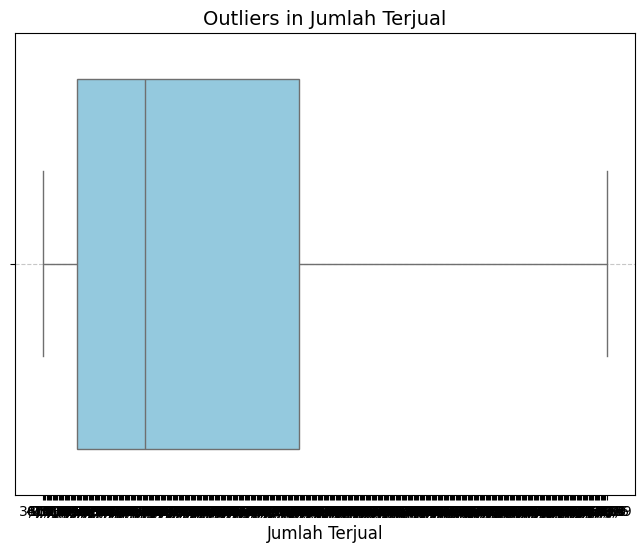

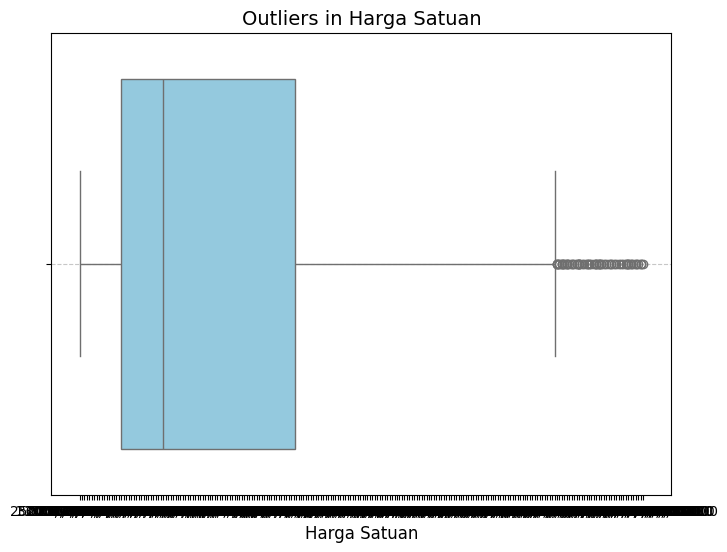

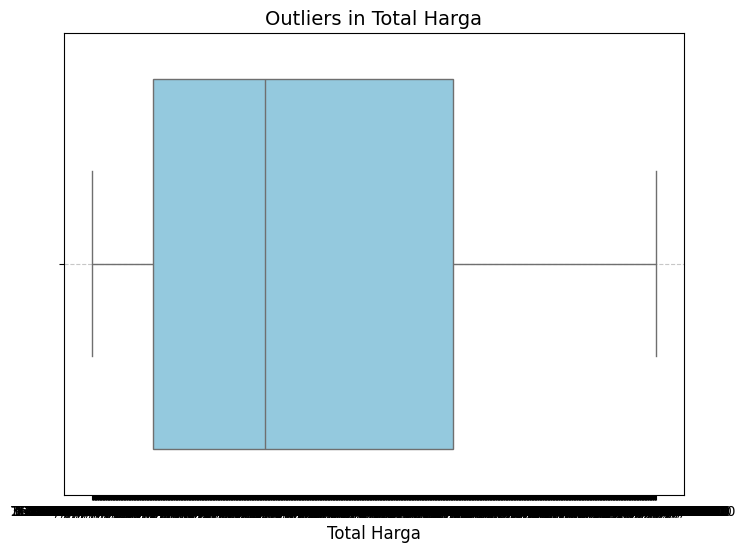

In [51]:
# Mendeteksi outlier menggunakan rentang interkuartil (IQR) untuk kolom numerik
def plot_outliers(column_name, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column_name], color='skyblue')
    plt.title(title, fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_outliers('Jumlah Terjual', 'Outliers in Jumlah Terjual')
plot_outliers('Harga Satuan', 'Outliers in Harga Satuan')
plot_outliers('Total Harga', 'Outliers in Total Harga')


C:\Users\user\AppData\Local\Temp\ipykernel_24112\2988802089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")


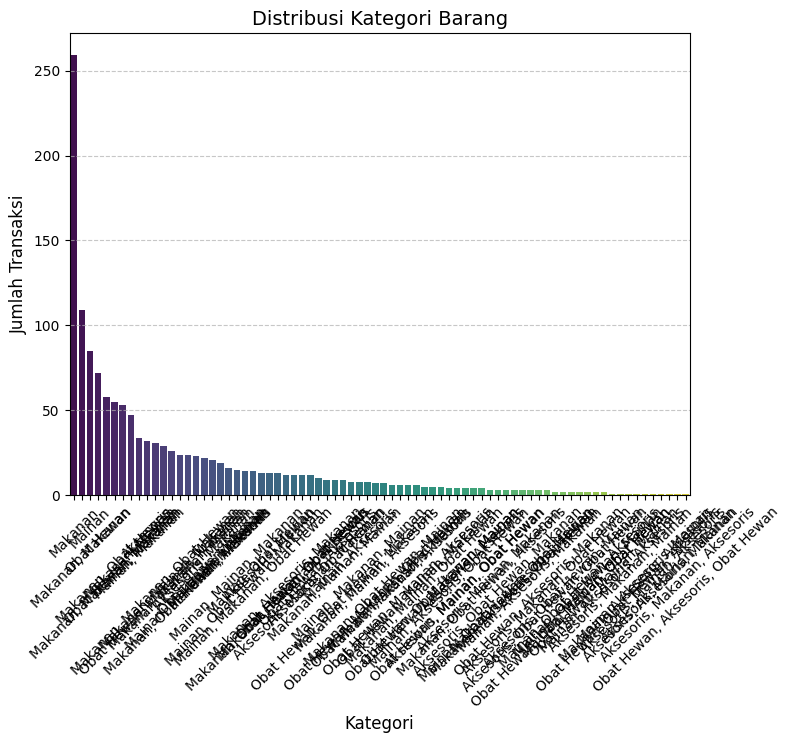

In [52]:
# Menampilkan jumlah transaksi berdasarkan kategori barang
category_distribution = df['Kategori'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")
plt.title("Distribusi Kategori Barang", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24112\539559230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette="viridis")


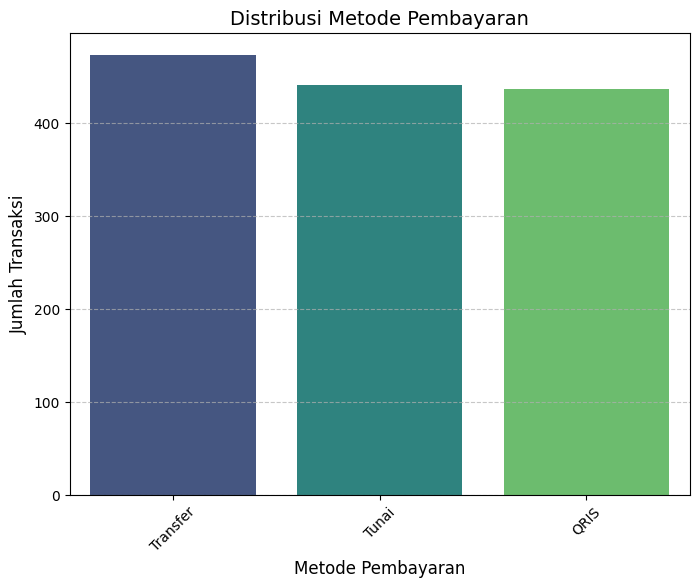

In [53]:
# Memperlihatkan proporsi penggunaan metode pembayaran.
payment_distribution = df['Metode Pembayaran'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette="viridis")
plt.title("Distribusi Metode Pembayaran", fontsize=14)
plt.xlabel("Metode Pembayaran", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
# Menampilkan transaksi yang terdeteksi sebagai outlier berdasarkan kolom Total Harga
# outliers_total_harga = df

# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Kategori', y='Total Harga', data=outliers_total_harga, palette="coolwarm")
# plt.title("Outliers in Total Harga by Kategori", fontsize=14)
# plt.xlabel("Kategori", fontsize=12)
# plt.ylabel("Total Harga", fontsize=12)
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

DATA PREPARATION

In [55]:
# Before calculating IQR, make sure 'Total Harga' is numeric
df['Total Harga'] = pd.to_numeric(df['Total Harga'], errors='coerce')  # Convert to numeric, handle errors

# Calculate IQR
Q1 = df['Total Harga'].quantile(0.25)
Q3 = df['Total Harga'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = df[(df['Total Harga'] < lower_bound) | (df['Total Harga'] > upper_bound)]

In [56]:
# Menangani dengan metode capping, yaitu mengganti nilai yang melebihi batas atas dengan nilai batas atas
data_no_outliers = df.copy()
data_no_outliers['Total Harga'] = np.where(
    df['Total Harga'] > upper_bound, upper_bound,
    np.where(df['Total Harga'] < lower_bound, lower_bound, df['Total Harga'])
)

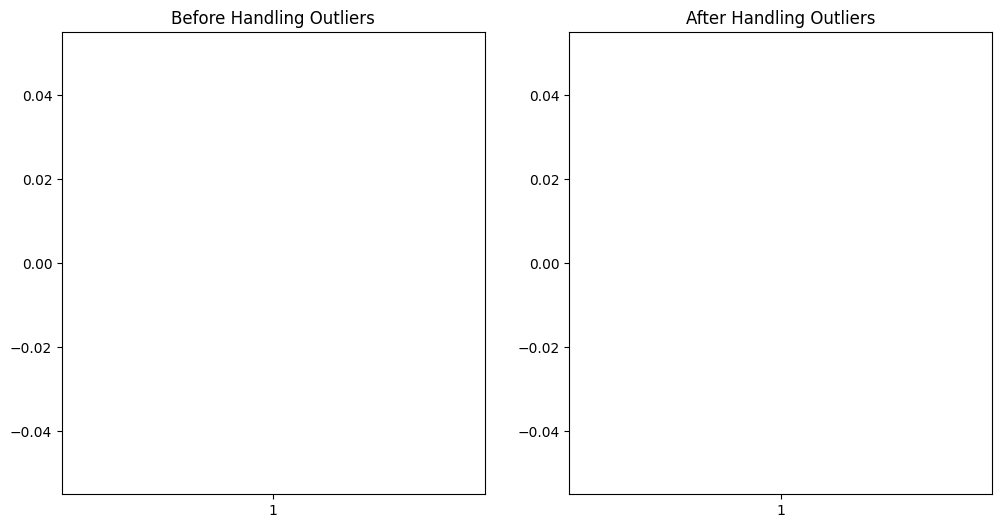

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['Total Harga'])
plt.title("Before Handling Outliers")
plt.subplot(1, 2, 2)
plt.boxplot(data_no_outliers['Total Harga'])
plt.title("After Handling Outliers")
plt.show()

In [58]:
# Encoding kolom Kategori dan Metode Pembayaran
data_no_outliers['Kategori_Encoded'] = data_no_outliers['Kategori'].astype('category').cat.codes
data_no_outliers['Metode_Pembayaran_Encoded'] = data_no_outliers['Metode Pembayaran'].astype('category').cat.codes

print("Kategori encoding:\n", data_no_outliers[['Kategori', 'Kategori_Encoded']].drop_duplicates())
print("Metode Pembayaran encoding:\n", data_no_outliers[['Metode Pembayaran', 'Metode_Pembayaran_Encoded']].drop_duplicates())

Kategori encoding:
                                Kategori  Kategori_Encoded
0                      Makanan, Makanan                47
1                                Mainan                17
2       Obat Hewan, Obat Hewan, Makanan                74
3                               Makanan                36
4            Aksesoris, Mainan, Makanan                 6
...                                 ...               ...
842          Mainan, Mainan, Obat Hewan                25
851       Aksesoris, Aksesoris, Makanan                 2
929           Aksesoris, Mainan, Mainan                 5
1143      Aksesoris, Makanan, Aksesoris                 9
1323  Obat Hewan, Aksesoris, Obat Hewan                61

[76 rows x 2 columns]
Metode Pembayaran encoding:
   Metode Pembayaran  Metode_Pembayaran_Encoded
0              QRIS                          0
2             Tunai                          2
4          Transfer                          1


In [59]:
# Ubah Tanggal Transaksi menjadi datetime
data_no_outliers['Tanggal Transaksi'] = pd.to_datetime(data_no_outliers['Tanggal Transaksi'])

# Tambahkan fitur waktu
data_no_outliers['Bulan Transaksi'] = data_no_outliers['Tanggal Transaksi'].dt.month

data_no_outliers.head()

,ID Transaksi,Tanggal Transaksi,Nama Barang,Kategori,Jumlah Terjual,Harga Satuan,Total Harga,Metode Pembayaran,Kategori_Encoded,Metode_Pembayaran_Encoded,Bulan Transaksi
0,TX-20241023-001,2024-10-23,"Life Cat Pouch - Kitten Tuna, Life Cat Pouch -...","Makanan, Makanan","9, 1","25000, 13000",NaN,QRIS,47,0,10
1,TX-20240511-001,2024-05-11,Kong Puppy Teething Stick,Mainan,5,20000,100000.0,QRIS,17,0,5
2,TX-20240515-001,2024-05-15,"Frontline Plus Flea & Tick Treatment, Nutri-Ve...","Obat Hewan, Obat Hewan, Makanan","3, 10, 7","25000, 13000, 20000",NaN,Tunai,74,2,5
3,TX-20241031-001,2024-10-31,Life Cat Can - Chicken,Makanan,6,30000,180000.0,QRIS,36,0,10
4,TX-20240202-001,2024-02-02,"Rogz Utility Dog Leash - Medium, Trixie Cat La...","Aksesoris, Mainan, Makanan","4, 5, 9","13000, 13000, 20000",NaN,Transfer,6,1,2


C:\Users\user\AppData\Local\Temp\ipykernel_24112\2932829782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaksi_bulanan.index, y=transaksi_bulanan.values, palette="viridis")


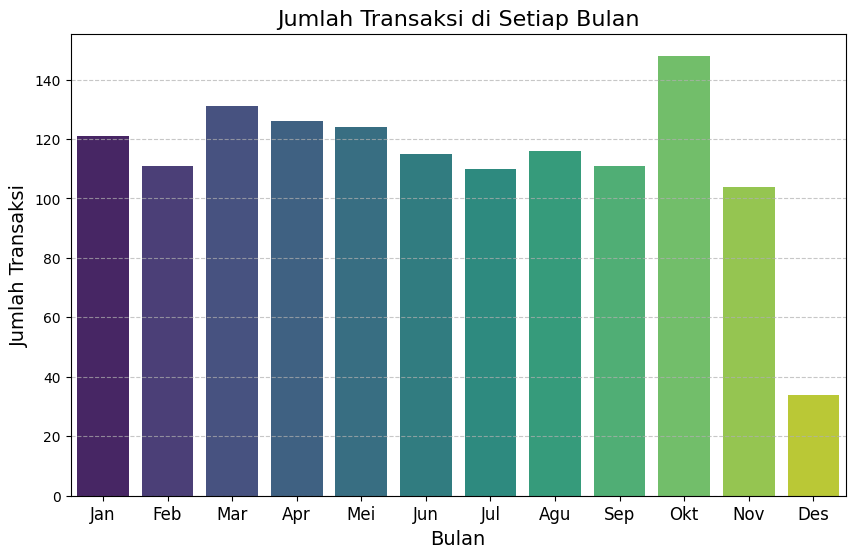

In [60]:
# Mengelompokkan data berdasarkan 'Bulan Transaksi' dan menghitung jumlah transaksi
transaksi_bulanan = data_no_outliers.groupby('Bulan Transaksi').size()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transaksi_bulanan.index, y=transaksi_bulanan.values, palette="viridis")
plt.title("Jumlah Transaksi di Setiap Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Jumlah Transaksi", fontsize=14)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [61]:
# Menghapus kolom yang tidak relevan
data_cleaned = data_no_outliers[['Jumlah Terjual', 'Harga Satuan', 'Total Harga']]

MODELLING

1. Clustering (K-Means)

In [62]:
# Clean the 'Total Harga' column by removing commas and converting to numeric
df['Total Harga'] = df['Total Harga'].replace({',': ''}, regex=True)  # Remove commas
df['Total Harga'] = pd.to_numeric(df['Total Harga'], errors='coerce')  # Convert to numeric

# Now you can apply scaling
from sklearn.preprocessing import StandardScaler

# Normalize the features (assuming 'data_cleaned' is the data you want to scale)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Total Harga']])  # Use the correct column for scaling

In [63]:

# Menentukan Jumlah Cluster (Metode Elbow)
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Visualisasi Metode Elbow
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

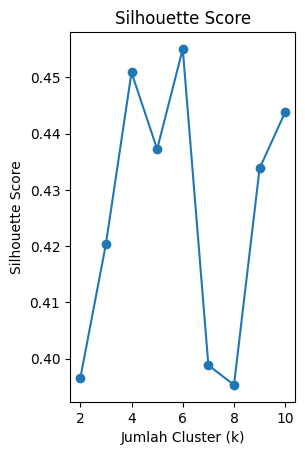

In [55]:
# Visualisasi Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6420\4117754601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)


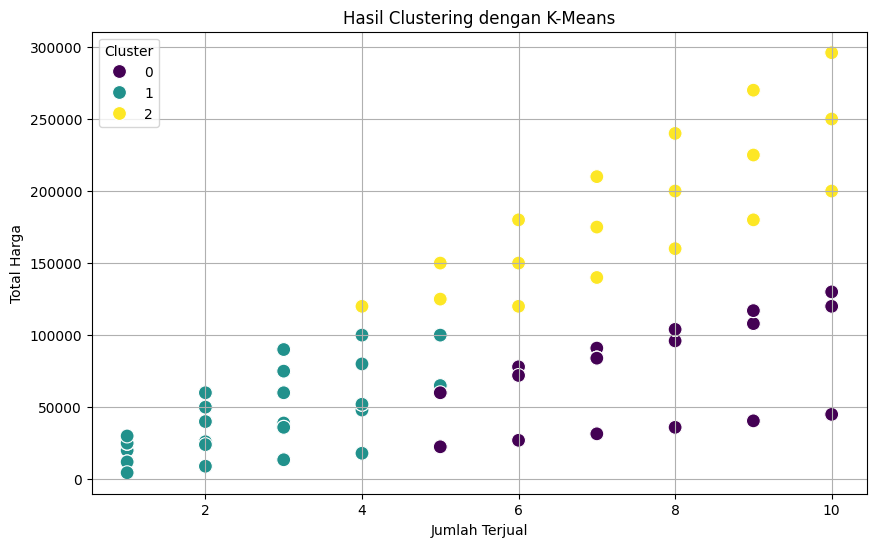

In [56]:
# Menerapkan K-Means dengan jumlah cluster yang dipilih (misalnya k=3)
optimal_k = 3  # Ganti dengan nilai optimal berdasarkan analisis sebelumnya
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualisasi Hasil Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Jumlah Terjual'], y=data_cleaned['Total Harga'], hue=data_cleaned['Cluster'], palette='viridis', s=100)
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Total Harga')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Memilih fitur untuk clustering
X = data_no_outliers[['Jumlah Terjual', 'Harga Satuan']]

# Membuat model K-Means dengan 3 cluster (misalnya)
kmeans = KMeans(n_clusters=3)
data_no_outliers['Cluster'] = kmeans.fit_predict(X)

# Menampilkan hasil clustering
print(data_no_outliers[['ID Transaksi', 'Cluster']])


         ID Transaksi  Cluster
0     TX-20241111-001        0
1     TX-20241111-001        0
2     TX-20241111-001        0
3     TX-20241013-001        0
4     TX-20241013-001        2
...               ...      ...
2679  TX-20241026-004        1
2680  TX-20240913-005        1
2681  TX-20240913-005        1
2682  TX-20240501-003        1
2683  TX-20240501-003        1

[2684 rows x 2 columns]


2. Classification (Random Forest)

In [58]:
# ----------------------
# Classification (Random Forest)
# ----------------------
# Prepare data for classification
classification_data = data_no_outliers[['Kategori_Encoded', 'Metode_Pembayaran_Encoded', 'Bulan Transaksi', 'Jumlah Terjual']].copy()
classification_data.loc[:, 'Laku'] = np.where(data_no_outliers['Jumlah Terjual'] > data_no_outliers['Jumlah Terjual'].mean(), 1, 0)
X = classification_data.drop('Laku', axis=1)
y = classification_data['Laku']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       261

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

Accuracy: 1.0


In [59]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average CV Score: 1.0


In [60]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                     Feature  Importance
3             Jumlah Terjual    0.993705
2            Bulan Transaksi    0.003224
0           Kategori_Encoded    0.001898
1  Metode_Pembayaran_Encoded    0.001172


3. Classification (Decision Tree)

In [ ]:
# ----------------------
# Classification (Decision Tree)
# ----------------------

# Prepare data for classification
classification_data = data_no_outliers[['Kategori_Encoded', 'Metode_Pembayaran_Encoded', 'Bulan Transaksi', 'Jumlah Terjual']].copy()
classification_data.loc[:, 'Laku'] = np.where(data_no_outliers['Jumlah Terjual'] > data_no_outliers['Jumlah Terjual'].mean(), 1, 0)
X = classification_data.drop('Laku', axis=1)
y = classification_data['Laku']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate model
y_pred = dt_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       261

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

Accuracy: 1.0


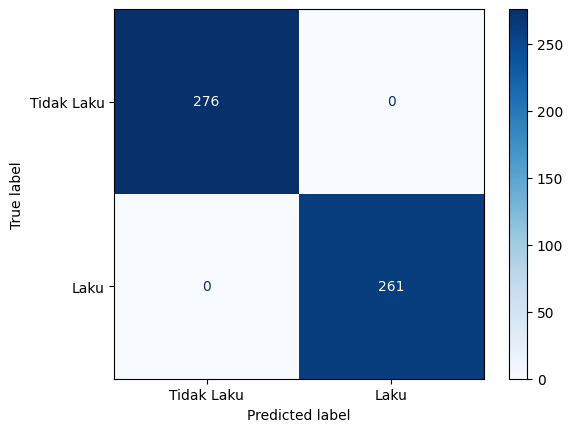

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Laku', 'Laku'])
cm_display.plot(cmap='Blues')


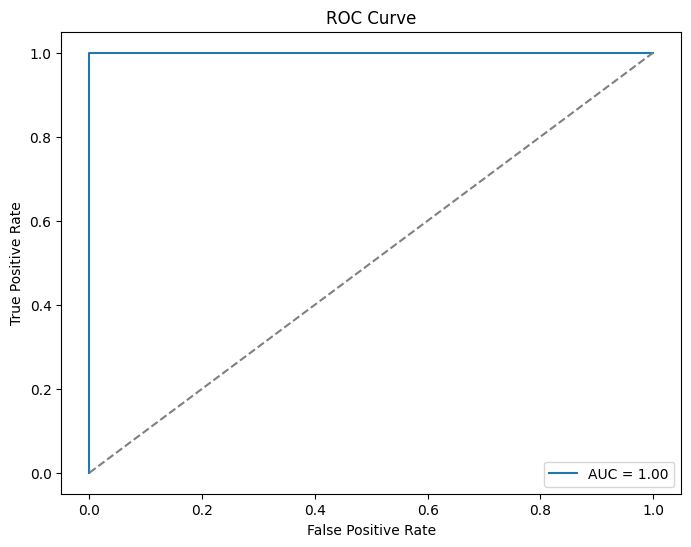

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas 'Laku'
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [65]:
feature_importances = dt_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                     Feature  Importance
3             Jumlah Terjual         1.0
0           Kategori_Encoded         0.0
1  Metode_Pembayaran_Encoded         0.0
2            Bulan Transaksi         0.0


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


Cross-Validation Accuracy: 1.0 ± 0.0


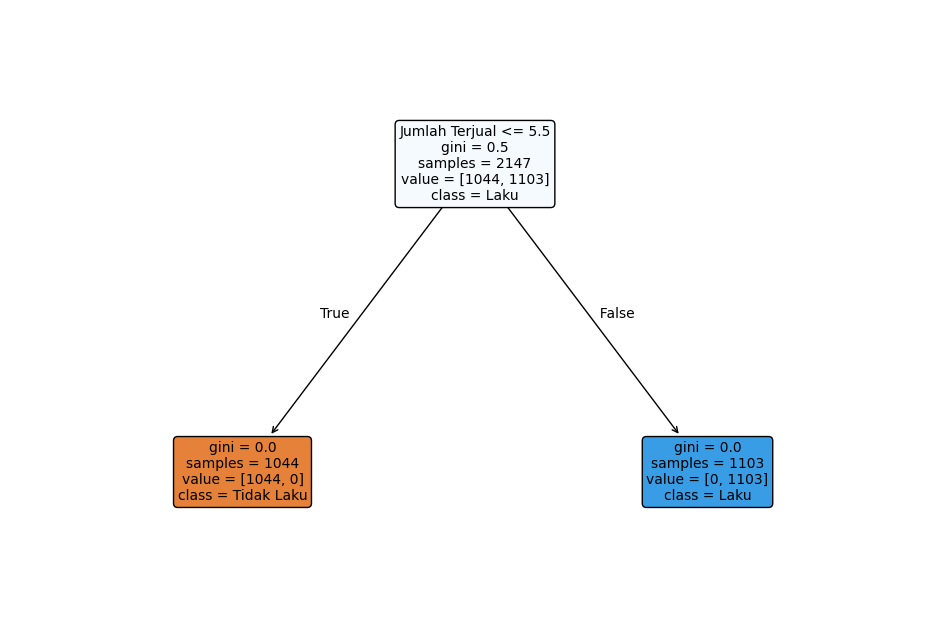

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['Tidak Laku', 'Laku'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()


4. Time Series (Forecasting)

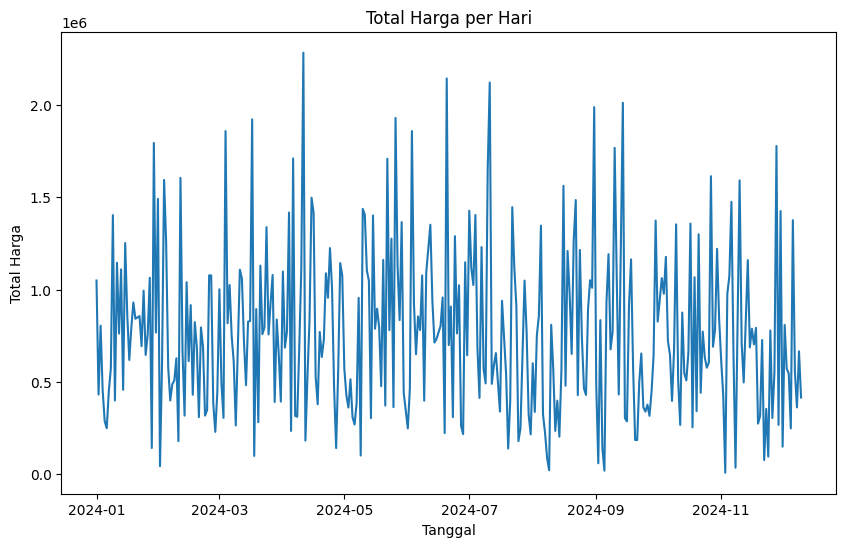

In [68]:
# Mengagregasi total harga per hari
df_daily = data_no_outliers.groupby('Tanggal Transaksi')['Total Harga'].sum().reset_index()

# Visualisasi total harga per hari
plt.figure(figsize=(10, 6))
plt.plot(df_daily['Tanggal Transaksi'], df_daily['Total Harga'])
plt.title('Total Harga per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Harga')
plt.show()

# Menyusun data untuk time series forecasting
df_daily.set_index('Tanggal Transaksi', inplace=True)

In [69]:
from statsmodels.tsa.stattools import adfuller

# Tes ADF untuk stasioneritas
result = adfuller(df_daily['Total Harga'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -18.673969059515898
p-value: 2.0438460971898472e-30


In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Membuat model SARIMA dengan parameter yang lebih tinggi untuk fluktuasi yang lebih besar
model = SARIMAX(df_daily['Total Harga'], order=(3, 0, 3), seasonal_order=(2, 1, 2, 12))  # Mengubah p, d, q, dan musiman
model_fit = model.fit()

# Melihat ringkasan model
print(model_fit.summary())

# Prediksi 30 hari ke depan
forecast = model_fit.forecast(steps=90)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                             Total Harga   No. Observations:                  338
Model:             SARIMAX(3, 0, 3)x(2, 1, [1, 2], 12)   Log Likelihood               -4751.110
Date:                                 Sun, 22 Dec 2024   AIC                           9524.220
Time:                                         10:32:39   BIC                           9565.876
Sample:                                              0   HQIC                          9540.843
                                                 - 338                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1816      0.428     -0.424      0.671      -1.020       0

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


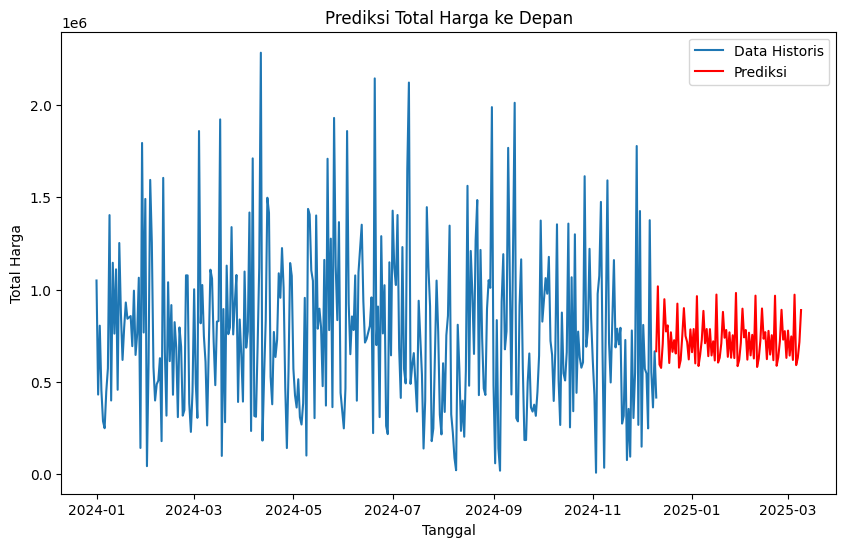

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily.index, df_daily['Total Harga'], label='Data Historis')
plt.plot(pd.date_range(df_daily.index[-1], periods=90, freq='D'), forecast, label='Prediksi', color='red')
plt.title('Prediksi Total Harga ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Total Harga')
plt.legend()
plt.show()
